In [18]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import spacy
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/U.S._Chronic_Disease_Indicators__CDI_.csv")
df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2015,2015,US,United States,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,NaN,$,US Dollars,...,59,ALC,ALC8_0_2,USD,OVERALL,OVR,NaN,NaN,NaN,NaN
1,2012,2012,DC,District of Columbia,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,NaN,$,US Dollars,...,11,ALC,ALC8_0_1,USD,OVERALL,OVR,NaN,NaN,NaN,NaN
2,2012,2012,GU,Guam,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,NaN,$,US Dollars,...,66,ALC,ALC8_0_1,USD,OVERALL,OVR,NaN,NaN,NaN,NaN
3,2012,2012,PR,Puerto Rico,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,NaN,$,US Dollars,...,72,ALC,ALC8_0_1,USD,OVERALL,OVR,NaN,NaN,NaN,NaN
4,2012,2012,US,United States,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,NaN,$,US Dollars,...,59,ALC,ALC8_0_1,USD,OVERALL,OVR,NaN,NaN,NaN,NaN


# Keep only the unique questions

In [4]:
df = df[~df.duplicated("Question", keep="first")][["Topic", "Question"]].reset_index(drop=True)
df.head()

,Topic,Question
0,Alcohol,Amount of alcohol excise tax by beverage type ...
1,Alcohol,Amount of alcohol excise tax by beverage type ...
2,Alcohol,Amount of alcohol excise tax by beverage type ...
3,"Nutrition, Physical Activity, and Weight Status",Obesity among adults aged >= 18 years
4,Cardiovascular Disease,Hospitalization for heart failure among Medica...


# Breakdown of questions' topics

In [5]:
topics = df["Topic"].value_counts()
topics

Nutrition, Physical Activity, and Weight Status    37
Cancer                                             20
Diabetes                                           20
Cardiovascular Disease                             18
Overarching Conditions                             16
Chronic Obstructive Pulmonary Disease              16
Tobacco                                            16
Alcohol                                            16
Arthritis                                          10
Oral Health                                         9
Asthma                                              9
Older Adults                                        4
Chronic Kidney Disease                              4
Mental Health                                       3
Reproductive Health                                 3
Immunization                                        1
Disability                                          1
Name: Topic, dtype: int64

# Filter out categories with few entries

In [6]:
df = df[df["Topic"].str.match("|".join(topics.nlargest(11).index.to_list()))].reset_index(drop=True)
df.head()

,Topic,Question
0,Alcohol,Amount of alcohol excise tax by beverage type ...
1,Alcohol,Amount of alcohol excise tax by beverage type ...
2,Alcohol,Amount of alcohol excise tax by beverage type ...
3,"Nutrition, Physical Activity, and Weight Status",Obesity among adults aged >= 18 years
4,Cardiovascular Disease,Hospitalization for heart failure among Medica...


# Convert question to embeddings

In [8]:
nlp = spacy.load('en_core_web_lg')

In [9]:
def question_to_vec(question):
    tokens = nlp(question)
    emb_matrix = np.zeros((len(tokens), 300))
    for i, token in enumerate(tokens):
        emb_matrix[i,:] = token.vector
    return emb_matrix.mean(axis=0)
embeddings = df["Question"].apply(question_to_vec).to_list()

# Reduce dimensionality

In [15]:
pca_2d = PCA(n_components=2)
coords = pca_2d.fit_transform(embeddings)
coords.shape

(187, 2)

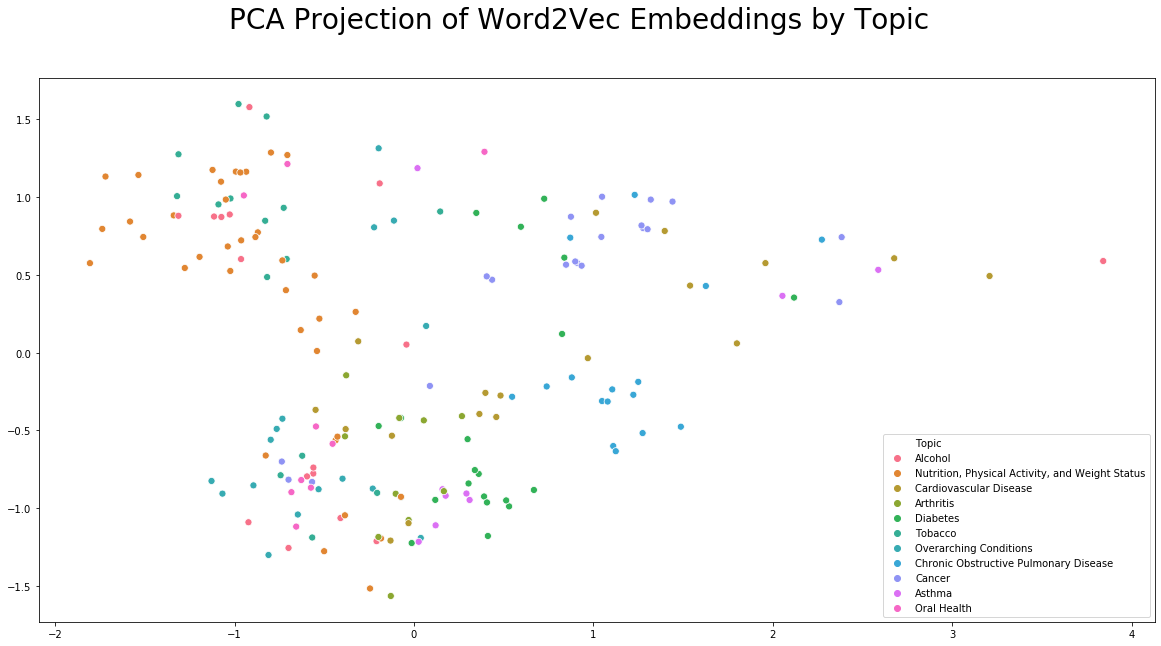

In [16]:
fig = plt.figure(figsize=(20, 10))
fig.suptitle("PCA Projection of Word2Vec Embeddings by Topic", fontsize=28)
sns.scatterplot(coords[:,0], coords[:,1], hue=df["Topic"], s=50)

In [19]:
tsne = TSNE(n_components=2)
coords = tsne.fit_transform(embeddings)
coords.shape

(187, 2)

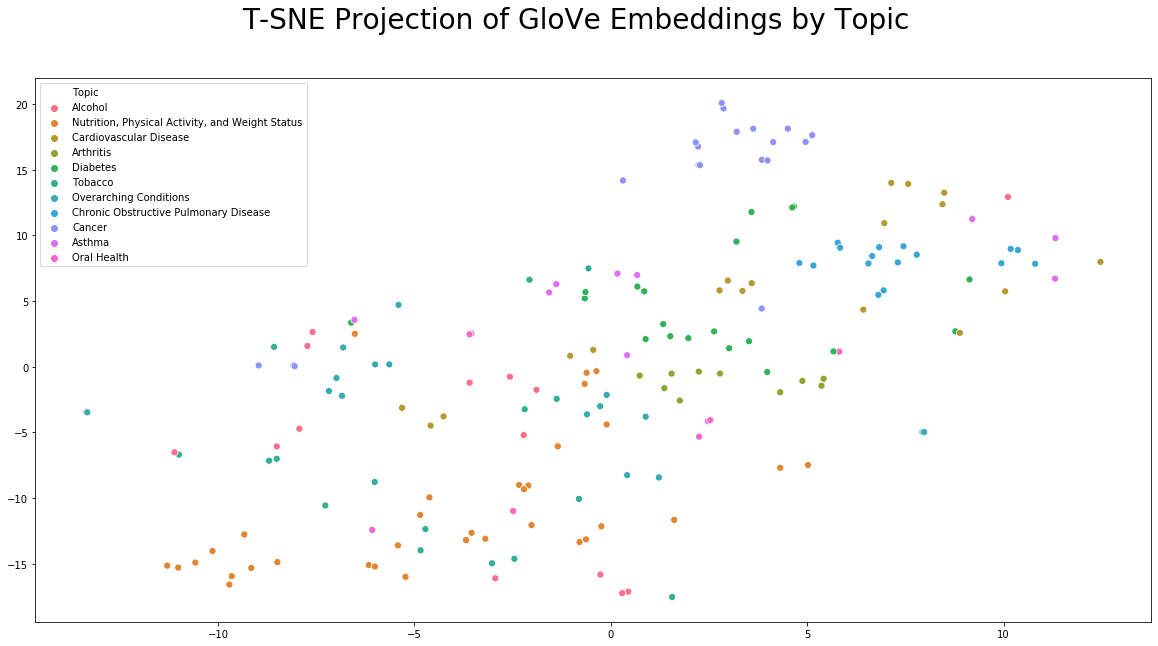

In [20]:
fig = plt.figure(figsize=(20, 10))
fig.suptitle("T-SNE Projection of GloVe Embeddings by Topic", fontsize=28)
sns.scatterplot(coords[:,0], coords[:,1], hue=df["Topic"], s=50)

In [ ]:
pca = PCA(n_components=25)
pca.fit(embeddings)

In [ ]:
features = range(pca.n_components_)
plt.figure(figsize=(20, 10))
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.xlabel('PCA feature')
plt.ylabel('variance')

In [ ]:
distribution = []
for j in range(100):
    avg_params 
    params = pd.DataFrame(columns=["# of components", "Inertia", "Homogeneity Score"])
    for i in range(1, 26):
        pca = PCA(n_components=i)
        kmeans = KMeans(n_clusters=11)
        steps = [("pca", pca), ("kmeans", kmeans)]
        pipeline = Pipeline(steps)
        pipeline.fit(embeddings)
        params.loc[i-1] = [i, kmeans.inertia_, homogeneity_score(df["Topic"], pipeline.predict(embeddings))]
    distribution.append(params["Homogeneity Score"].idxmax())

In [ ]:
plt.xticks(range(5, 25))
plt.hist(distribution)